## SIA Clustering exercises for date range : 20180101-20181231 
#### Project id = 'sparkline-integrators'
#### Table id = clustering.fullbasetable

Introduction: 
For the following clustering exercise, we first developed a base table that was imported into Sparkline-integrators (Bigquery) from:

**BigQuery Project** :
**api-project-929144044809**

If you want to run or alter the basetable please look for ***basetablequery*** in SIA project Id if you wish to make any alternation.

The project Id we use to pull the data into Sparkline-Integrators is:
Project Name: ***BigQuery Project*** ProjectId: ***api-project-929144044809***
The name of dataset: ***46948678***
Table: ga_sessions_

There are two queries you would need to run and specify the destination tables
Query1: ***clustering_basetablequery_updated***
Query2: ***clustering_RevenueBaseTable_updated***

Please specify the destination table for ***basetablequery*** to : 
Project Name: ***sparkline-integrators***
Dataset Name: ***clustering***
Table Name: ***Intent_basetable***

Please specify the destination table for ***RevenueBaseTable*** to : 
Project Name: ***sparkline-integrators***
Dataset Name: ***clustering***
Table Name: ***Revenue_basetable***

After that, you change your Project to ***sparkline-integrators*** in bigquery, and need to run the ***clustering_basetableJoinQuery_updated*** to join the two tables and save it under the same sparkline- integrators, clustering dataset under table name ***fullbasetable ***
Then come back to Datalab, and run this notebook.

The Date range for the above tables is : ***2018/12/1 - 2018/12/31***
If you wish to change the date range, make sure you specify that in the two queries above.

I have chosen the following libraries below which we will use throughout this notebook to run and interpret our models.

In [1]:
#accquire the libraries
import pandas as pd #for data processing
import numpy as np # for linear algebra
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
from sklearn.cluster import KMeans #clustering
from scipy.spatial.distance import cdist #spatial distance
from scipy.spatial.distance import pdist # spatial distance
from matplotlib.pyplot import figure # changing figures for plots
from scipy import cluster #clustering from Scipy
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn import preprocessing
import matplotlib
import matplotlib.colors as mcolors

In [2]:
#get the bigquery library
from google.cloud import bigquery
project_id = 'sparkline-integrators'
client = bigquery.Client(project=project_id)

We then import the google cloud library here along with the project id that we will use to extract the table

To keep the basetable query in bigquery as granular as possible, the agreegated script is written here, and is grouped by fullVisitorId and filtered for SPAM and engagements that are null or 0. Details on what traffic sources are classified as SPAM is found in basetablequery

To import data from Google Cloud Storage, copy the query below, run it in BigQuery and save the table to Google Cloud Storage.

In [3]:
import time
start = time.time()
query_job = client.query("""
  SELECT 
  fullVisitorId,
  SUM(RegisteredUser) AS NonKF_RegisteredUser,
  SUM(KrisFlyerUser) AS KF_Basic,
  SUM(EliteGold+EliteSilver) AS KF_Elite,
  SUM(QualifiedPPS+SolitairePPS+LifePPS) AS KF_PPS,
  SUM(CorporateTravelManager+CorporateTraveller) AS Corporate_Travel,
  SUM(HighFlyer) AS HighFlyer,
  SUM(Guest) AS Guest,
  COUNT( DISTINCT sessionID) AS sessions,
  SUM(Low_Engagements) AS Low_Engagement,
  SUM(Medium_Engagements) AS Mid_Engagement,
  SUM(High_Engagements) AS High_Engagement,
  SUM( Low_Engagements_withConversion) as Low_Engagements_withConversion,
  SUM( Medium_Engagements_withConversion) as Medium_Engagements_withConversion,
  SUM( High_Engagements_withConversion) as High_Engagements_withConversion,
  SUM( No_Engagements_withConversion) as No_Engagements_withConversion,
  SUM(Desktop) AS Desktop,
  SUM(Mobile+Tablet) AS Mobile_Tablet,
  SUM(direct_none+google_organic+yahoo_organic+bing_organic+naver_organic+sm_email+baidu_organic) AS Owned,
  SUM(google_cpc+dfa_cpm+dbm_cpm+bing_cpc+yahoo_cpc+aod_mobile_banner+hdt_mobile_banner+aod_app_banner+hdt_pc_banner+qihoo_cpc+yahoo_jp_cpc+naver_cpc) AS Paid,
  SUM(facebook_referral+facebook_social+mkflyscoot_referral+flyscoot_referral+googletravelad_referral+silkair_referral+skyscanner_referral+kayak_referral+sqmi_wechat_social) AS Earned,
  SUM(OtherSource_Medium) AS OtherChannels,
  
  SUM(Promotions+Destinations+Packages+Your_Booking+Intercity_Transfers+Our_Story+Before_The_Flight+Cabins+Dining+Entertainment) AS PlanTravel_Flyingwithus,
  SUM(hotel+carRentals+travel_add_ons+Insurance) AS HotelInsurance,
  SUM(CheckIn+Baggage+Requests+Visas+Charges+SpecialAssistance+CustomerCommitment+PartnerAirlines+Travelprogramme) AS TravelInfo,
  SUM(PSSClub+KrisFlyer+EarnMiles+SpendMiles+FormsAndFees+KrisflyerRegistration) AS PSSClubKrisFlyer,
  SUM(TravelProgramme) AS ForBusiness,
  
  SUM(English) AS EnglishLanguage,
  SUM(French+German+Spanish+Italian) AS EuropeanLanguages,
  SUM(Japanese+Indonesian+Chinese) AS AsianLanguages,
  
  SUM(BNE_BNE+CBR_WLG+MEL_MEL+MEL_WLG+SYD_SYD+WLG_CBR+WLG_MEL+WLG_PER) AS AuNz_AuNz,
  SUM(ADL_AMD+ADL_BOM+ADL_CMB+ADL_DEL+AKL_AMD+AKL_BOM+AKL_CMB+AKL_COK+AKL_DEL+AKL_HYD+AKL_MAA+BNE_AMD+BNE_BLR+BNE_BOM+BNE_CMB+
  BNE_COK+BNE_DEL+BNE_HYD+BNE_KTM+BNE_MAA+BNE_MLE+CBR_CMB+CBR_DEL+CHC_DEL+MEL_AMD+MEL_ATQ+MEL_BLR+MEL_BOM+MEL_CCU+MEL_CJB+MEL_CMB+MEL_COK+
  MEL_DEL+MEL_HYD+MEL_KTM+MEL_MAA+MEL_MLE+MEL_TRV+PER_AMD+PER_BOM+PER_CMB+PER_COK+PER_DEL+PER_HYD+PER_MAA+PER_MLE+SYD_AMD+SYD_BLR+SYD_BOM+
  SYD_CCU+SYD_CJB+SYD_CMB+SYD_COK+SYD_DEL+SYD_HYD+SYD_KTM+SYD_MAA+SYD_MLE+SYD_TRV+WLG_BOM+WLG_DEL) AS AuNz_CAsia,
  SUM(BNE_JNB+MEL_CPT+MEL_JNB+PER_JNB+SYD_CPT+SYD_JNB) AS AuNz_CSAfrica,
  SUM(ADL_LHR+AKL_AMS+AKL_CDG+AKL_FRA+AKL_LHR+AKL_MAN+BNE_AMS+BNE_ATH+BNE_BCN+BNE_CDG+BNE_CPH+BNE_FCO+BNE_FRA+BNE_LHR+BNE_MAN+BNE_MUC+BNE_MXP+
  BNE_ZRH+CBR_LHR+CHC_LHR+CNS_LHR+DRW_LHR+MEL_AMS+MEL_ATH+MEL_BCN+MEL_CDG+MEL_CPH+MEL_FCO+MEL_FRA+MEL_IST+MEL_LHR+MEL_MAN+MEL_MUC+MEL_MXP+MEL_ZRH+
  PER_AMS+PER_CDG+PER_FCO+PER_FRA+PER_LHR+PER_MAN+PER_MXP+PER_ZRH+SYD_AMS+SYD_ATH+SYD_BCN+SYD_CDG+SYD_CPH+SYD_FCO+SYD_FRA+SYD_IST+SYD_LHR+SYD_MAN+
  SYD_MUC+SYD_MXP+SYD_ZRH+WLG_LHR ) AS AuNz_Europe,
  SUM(BNE_HND+BNE_NRT+BNE_TYO+MEL_HND+MEL_KIX+MEL_NRT+MEL_TYO+PER_HND+PER_KIX+PER_NRT+PER_TYO+SYD_HND+SYD_KIX+SYD_NRT+SYD_TYO) AS AuNz_Japan,
  SUM(SYD_DXB) AS AuNz_MEast,
  SUM(MEL_LAX+PER_JFK+PER_LAX+PER_SFO+SYD_JFK+SYD_LAX) AS AuNz_NAmerica,
  SUM(ADL_HKG+BNE_HKG+BNE_ICN+BNE_PEK+BNE_PVG+MEL_HKG+MEL_ICN+MEL_PEK+MEL_PVG+MEL_TPE+PER_HKG+PER_ICN+PER_PEK+PER_PVG+PER_TPE
  +SYD_HKG+SYD_ICN+SYD_PEK+SYD_PVG+SYD_TPE) AS AuNz_NAsia,
  SUM(ADL_BKK+ADL_HKT+ADL_KUL+ADL_MNL+ADL_SGN+ADL_SIN+AKL_BKK+AKL_KUL+AKL_MNL+AKL_SGN+AKL_SIN+BNE_BKK+BNE_CEB+BNE_CGK+BNE_DAD+BNE_DVO+BNE_HAN+BNE_HKT+
  BNE_KUL+BNE_MNL+BNE_SGN+BNE_SIN+BNE_USM+CBR_SIN+CHC_MNL+CHC_SIN+CNS_SIN+DRW_MNL+DRW_SIN+MEL_BKK+MEL_CEB+MEL_CGK+MEL_DAC+MEL_DAD+MEL_DPS+MEL_HAN+MEL_HKT+MEL_KUL+
  MEL_MNL+MEL_PEN+MEL_PNH+MEL_SGN+MEL_SIN+MEL_USM+PER_BKK+PER_CEB+PER_DAD+PER_DVO+PER_HAN+PER_HKT+PER_KUL+PER_MNL+PER_PEN+PER_RGN+PER_SGN+PER_SIN+PER_USM+SYD_BKK+
  SYD_CEB+SYD_CGK+SYD_DAC+SYD_DPS+SYD_HAN+SYD_HKT+SYD_KUL+SYD_MNL+SYD_PEN+SYD_PNH+SYD_RGN+SYD_SGN+SYD_SIN+SYD_USM+WLG_SIN) AS AuNz_SAsia,
  SUM(AMD_ADL+AMD_AKL+AMD_BNE+AMD_MEL+AMD_PER+AMD_SYD+BLR_AKL+BLR_MEL+BLR_SYD+BOM_ADL+BOM_AKL+BOM_BNE+BOM_MEL+BOM_PER+BOM_SYD+CCU_MEL+CCU_SYD+CMB_AKL+CMB_BNE+
  CMB_MEL+CMB_PER+CMB_SYD+COK_AKL+COK_BNE+COK_MEL+COK_SYD+DEL_ADL+DEL_AKL+DEL_BNE+DEL_CHC+DEL_MEL+DEL_PER+DEL_SYD+HYD_AKL+HYD_BNE+HYD_MEL+HYD_SYD+MAA_AKL+MAA_MEL+MAA_SYD) AS CAsia_AuNz, 
  SUM(BOM_NRT) AS CAsia_Japan,
  SUM(AMD_EWR+AMD_SFO+BLR_LAX+BLR_SFO+BOM_LAX+BOM_SFO+CCU_SFO+CJB_SFO+COK_SFO+DEL_LAX+DEL_SFO+HYD_SFO+MAA_SFO+VTZ_SFO) AS CAsia_NAmerica,
  SUM(BOM_HKG+BOM_PVG+DEL_HKG) AS CAsia_NAsia, 
  SUM(AMD_SIN+BLR_SIN+BOM_BKK+BOM_CGK+BOM_DPS+BOM_KUL+BOM_MNL+BOM_SIN+CCU_SIN+CJB_SIN+CMB_BKK+CMB_DPS+CMB_SIN+COK_SIN+DEL_BKK+DEL_CGK+DEL_DPS+DEL_MNL+DEL_SIN+
  HYD_SIN+MAA_SIN+MLE_KUL+MLE_MNL+MLE_SIN+TRV_SIN+VTZ_SIN) AS CAsia_SAsia,   
  SUM(JNB_AKL) AS CSAfrica_AuNz, 
  SUM(CPT_DPS+CPT_HKT+CPT_SIN+JNB_BKK+JNB_DPS+JNB_HKT+JNB_KUL+JNB_SIN) AS CSAfrica_SAsia, 
  SUM(AMS_AKL+AMS_BNE+AMS_MEL+AMS_PER+AMS_SYD+ARN_AKL+ARN_SYD+BCN_SYD+CDG_AKL+CDG_BNE+CDG_MEL+CDG_PER+CDG_SYD+CPH_AKL+CPH_BNE+CPH_MEL+CPH_SYD+DUS_AKL+DUS_SYD+FCO_MEL+
  FCO_SYD+FRA_AKL+FRA_BNE+FRA_CHC+FRA_MEL+FRA_PER+FRA_SYD+IST_MEL+IST_SYD+LHR_ADL+LHR_AKL+LHR_BNE+LHR_CBR+LHR_CHC+LHR_CNS+LHR_DRW+LHR_MEL+LHR_PER+LHR_SYD+LHR_WLG+
  MAN_ADL+MAN_AKL+MAN_BNE+MAN_CHC+MAN_MEL+MAN_PER+MAN_SYD+MUC_AKL+MUC_SYD+MXP_BNE+MXP_MEL+MXP_SYD+OSL_SYD+ZRH_AKL+ZRH_BNE+ZRH_MEL+ZRH_PER+ZRH_SYD) AS Europe_AuNz, 
  SUM(ARN_DME+DME_ARN+LHR_LHR) AS Europe_Europe,   
  SUM(LHR_TYO) AS Europe_Japan,  
  SUM(FRA_JFK+FRA_NYC+MAN_IAH) AS Europe_NAmerica,   
  SUM(LHR_HKG) AS Europe_NAsia,   
  SUM(AMS_BKK+AMS_CGK+AMS_DPS+AMS_SIN+ARN_BKK+ARN_DPS+ARN_SIN+ATH_SIN+BCN_BKK+BCN_DPS+BCN_MNL+BCN_SIN+BRU_DPS+BRU_SIN+CDG_BKK+CDG_CGK+CDG_DPS+CDG_HAN+CDG_HKT+
  CDG_KUL+CDG_MNL+CDG_PNH+CDG_SGN+CDG_SIN+CPH_BKK+CPH_DPS+CPH_MNL+CPH_SIN+DME_DPS+DME_DPS+DME_HKT+DME_SIN+DME_USM+DUB_SIN+DUS_BKK+DUS_DPS+DUS_HKT+DUS_SIN+
  FCO_MNL+FCO_SIN+FRA_BKK+FRA_CEB+FRA_CGK+FRA_DPS+FRA_HKT+FRA_KUL+FRA_MNL+FRA_SIN+FRA_USM+GVA_DPS+GVA_SIN+HAM_DPS+HAM_SIN+IST_BKK+IST_DPS+IST_SIN+LHR_BKK+LHR_CEB+
  LHR_CEB+LHR_CGK+LHR_DPS+LHR_DVO+LHR_HKT+LHR_KUL+LHR_MNL+LHR_PEN+LHR_SGN+LHR_SIN+LHR_USM+MAD_SIN+MAN_BKK+MAN_DPS+MAN_MNL+MAN_SIN+MUC_DPS+MUC_SIN+MXP_BKK+MXP_DPS+
  MXP_HKT+MXP_MNL+MXP_SIN+OSL_BKK+OSL_SIN+TXL_DPS+TXL_SIN+VIE_SIN+WAW_SIN+WAW_SIN+ZRH_BKK+ZRH_CEB+ZRH_CGK+ZRH_DPS+ZRH_HAN+ZRH_HKT+ZRH_KUL+ZRH_MNL+ZRH_SGN+ZRH_SIN+ZRH_USM) AS Europe_SAsia,   
  SUM(KIX_MEL+KIX_PER+TYO_PER+TYO_SYD) AS Japan_AuNz,  
  SUM(TYO_MLE) AS Japan_CAsia,  
  SUM(KIX_LHR+TYO_LHR) AS Japan_Europe,   
  SUM(NRT_LAX+TYO_LAX) AS Japan_NAmerica,     
  SUM(FUK_DPS+FUK_SIN+HIJ_SIN+HND_DPS+HND_SIN+KIX_BKK+KIX_CGK+KIX_DPS+KIX_HKT+KIX_KUL+KIX_SIN+NGO_DPS+NGO_SIN+NRT_DPS+NRT_SIN+TYO_BKK+TYO_CGK+TYO_DPS+TYO_HKT+TYO_KUL+TYO_SIN) AS Japan_SAsia,     
  SUM(DXB_AKL+DXB_BNE+DXB_MEL+DXB_SYD) AS MEast_AuNz, 
  SUM(DXB_NRT) AS MEast_Japan,   
  SUM(DXB_HKG) AS MEast_NAsia,   
  SUM(DXB_BKK+DXB_CEB+DXB_CGK+DXB_CRK+DXB_DPS+DXB_DVO+DXB_KUL+DXB_MNL+DXB_SIN+JED_MNL) AS MEast_SAsia,  
  SUM(LAX_SYD+SFO_SYD) AS NAmerica_AuNz,    
  SUM(LAX_AMD+LAX_BLR+LAX_BOM+LAX_CMB+LAX_DEL+LAX_HYD+LAX_MAA+LAX_MLE+SFO_AMD+SFO_BLR+SFO_BOM+SFO_CCU+SFO_CJB+SFO_CMB+SFO_COK+SFO_DEL+SFO_HYD+SFO_MAA+SFO_MLE+SFO_VTZ) AS NAmerica_CAsia,     
   SUM(IAH_MAN+JFK_FRA+NYC_FRA) AS NAmerica_Europe,    
   SUM(LAX_NRT+LAX_TYO+SFO_NRT) AS NAmerica_Japan,   
   SUM(LAX_HKG+LAX_ICN+SFO_HKG+SFO_ICN) AS NAmerica_NAsia,      
   SUM(BOS_SIN+DFW_SIN+EWR_SIN+IAD_SIN+IAH_DPS+IAH_MNL+IAH_SGN+IAH_SIN+JFK_BKK+JFK_CGK+JFK_DPS+JFK_KUL+JFK_MNL+JFK_RGN+JFK_SIN+LAX_BKK+LAX_CGK+LAX_DPS+LAX_KUL+LAX_MNL+LAX_SGN+LAX_SIN+NYC_DPS+NYC_SIN+
   ORD_SIN+SEA_SIN+SFO_BKK+SFO_CGK+SFO_DAC+SFO_DPS+SFO_KUL+SFO_MNL+SFO_SGN+SFO_SIN+YVR_SIN+YYZ_SIN) AS NAmerica_SAsia,        
   SUM(HKG_ADL+HKG_AKL+HKG_BNE+HKG_CHC+HKG_MEL+HKG_PER+HKG_SYD+ICN_MEL+ICN_PER+ICN_SYD+PEK_MEL+PEK_SYD+PVG_BNE+PVG_MEL+PVG_PER+PVG_SYD+
   TPE_BNE+TPE_MEL+TPE_PER+TPE_SYD) AS NAsia_AuNz,       
   SUM(HKG_MLE+ICN_MLE+PEK_MLE+PVG_MLE+TPE_MLE) AS NAsia_CAsia,    
   SUM(HKG_AMS+HKG_CDG+HKG_CPH+HKG_FRA+HKG_LHR+HKG_MUC+HKG_MXP+HKG_ZRH+TPE_AMS+TPE_CDG+TPE_LHR+TPE_MUC+TPE_ZRH) AS NAsia_Europe,  
   SUM(HKG_DXB) AS NAsia_MEast,      
   SUM(HKG_LAX+HKG_SFO+ICN_LAX) AS NAsia_NAmerica,   
   SUM(CAN_SIN+CKG_SIN+CSX_SIN+CTU_SIN+HKG_BKK+HKG_CGK+HKG_DPS+HKG_KUL+HKG_PEN+HKG_SIN+HKG_SRG+HKG_SUB+ICN_DPS+ICN_HKT+ICN_LOP+
   ICN_SIN+ICN_USM+PEK_DPS+PEK_SIN+PVG_DPS+PVG_SIN+SZX_SIN+TPE_SIN+WUH_SIN+XMN_SIN) AS NAsia_SAsia,   
   SUM(BKK_ADL+BKK_AKL+BKK_BNE+BKK_CHC+BKK_MEL+BKK_PER+BKK_SYD+CGK_AKL+CGK_BNE+CGK_MEL+CGK_PER+CGK_SYD+DAC_MEL+DAC_SYD+HAN_MEL+KUL_ADL+KUL_AKL+KUL_BNE+KUL_CHC+KUL_MEL+
   KUL_PER+KUL_SYD+MNL_AKL+MNL_BNE+MNL_CHC+MNL_MEL+MNL_PER+MNL_SYD+PEN_MEL+PEN_PER+PEN_SYD+PNH_MEL+PNH_SYD+SGN_ADL+SGN_BNE+SGN_MEL+SGN_PER+SGN_SYD+SIN_ADL+SIN_AKL+SIN_BNE+SIN_CBR+SIN_CHC+
   SIN_CNS+SIN_DRW+SIN_HBA+SIN_MEL+SIN_OOL+SIN_PER+SIN_SYD+SIN_WLG+SIN_ZQN) AS SAsia_AuNz,  
   SUM(CGK_BOM+CGK_DEL+MNL_BOM+MNL_DEL+MNL_MLE+SIN_AMD+SIN_BLR+SIN_BOM+SIN_CCU+SIN_CJB+SIN_CMB+SIN_COK+SIN_DEL+SIN_HYD+SIN_KTM+SIN_MAA+SIN_MLE+SIN_TRV+SIN_VTZ) AS SAsia_CAsia, 
   SUM(BKK_AMS+BKK_BCN+BKK_CDG+BKK_FRA+BKK_IST+BKK_LHR+BKK_MUC+BKK_MXP+BKK_ZRH+BWN_LHR+CGK_AMS+CGK_CDG+CGK_FRA+CGK_LHR+CGK_ZRH+DPS_LHR+KUL_AMS+KUL_ATH+KUL_CDG+KUL_FRA+KUL_IST+KUL_LHR+KUL_ZRH+MNL_AMS+
	  MNL_BCN+MNL_CDG+MNL_FRA+MNL_LHR+MNL_ZRH+PEN_LHR+SGN_CDG+SGN_LHR+SIN_AMS+SIN_ARN+SIN_ATH+SIN_BCN+SIN_BER+SIN_BRU+SIN_CDG+SIN_CPH+SIN_DME+SIN_DUB+SIN_DUS+SIN_FCO+SIN_FRA+SIN_GVA+SIN_HAM+SIN_HEL+SIN_IST+SIN_LHR
	  +SIN_LIS+SIN_MAD+SIN_MAN+SIN_MUC+SIN_MXP+SIN_OSL+SIN_PRG+SIN_TXL+SIN_VIE+SIN_ZRH) AS SAsia_Europe, 
   SUM(BKK_FUK+BKK_HND+BKK_KIX+BKK_NGO+BKK_NRT+BKK_TYO+CGK_HND+CGK_KIX+CGK_NRT+CGK_TYO+KUL_HND+KUL_KIX+KUL_NRT+KUL_TYO+PEN_HND+PEN_KIX+PEN_NRT+PEN_TYO+SIN_CTS+SIN_FUK+SIN_HIJ+SIN_HND+SIN_KIX+SIN_NGO+SIN_NRT+
   SIN_OKA+SIN_TYO) AS SAsia_Japan,    
   SUM(CGK_DXB+DVO_DXB+KUL_DXB+MNL_DXB+SIN_CAI+SIN_DXB+SIN_TLV) AS SAsia_MEast,   
   SUM(BKK_EWR+BKK_JFK+BKK_LAX+BKK_SFO+CGK_EWR+CGK_JFK+CGK_LAX+CGK_SFO+KUL_EWR+KUL_JFK+KUL_LAX+KUL_SFO+MNL_JFK+MNL_LAX+MNL_SFO+SIN_BOS+SIN_EWR+SIN_HNL+SIN_IAD+SIN_IAH+SIN_JFK+SIN_LAS+SIN_LAX+SIN_MCO+SIN_NYC+
   SIN_ORD+SIN_SEA+SIN_SFO+SIN_YUL+SIN_YVR+SIN_YYZ) AS SAsia_NAmerica,   
   SUM(BKK_HKG+BKK_ICN+BWN_ICN+CGK_CAN+CGK_HKG+CGK_ICN+CGK_PEK+CGK_PVG+CGK_TPE+KUL_HKG+KUL_ICN+KUL_PEK+KUL_PVG+KUL_TPE+MNL_HKG+MNL_ICN+PEN_HKG+PEN_ICN+SIN_CAN+SIN_CKG+SIN_CSX+SIN_CTU+SIN_FOC+SIN_HKG+SIN_ICN+SIN_KMG+SIN_PEK+
   SIN_PUS+SIN_PVG+SIN_SZX+SIN_TPE+SIN_WUH+SIN_XMN+SUB_HKG+SUB_ICN) AS SAsia_NAsia, 
   SUM(BDO_SIN+BKI_SIN+BKK_CGK+BKK_DPS+BKK_SIN+BWN_SIN+CEB_SIN+CGK_BKK+CGK_HAN+CGK_KUL+CGK_MNL+CGK_SGN+CGK_SIN+CNX_SIN+DAC_DPS+DAC_KUL+DAC_MNL+DAC_SIN+DAD_SIN+DPS_SIN+DVO_SIN+HAN_DPS+HAN_SIN+HKT_SIN+JOG_SIN+KNO_SIN+KUL_BKK+KUL_MNL+KUL_SIN+
   MNL_BKK+MNL_CGK+MNL_DPS+MNL_HKT+MNL_KNO+MNL_KUL+MNL_SIN+PEN_SIN+PNH_SIN+REP_SIN+RGN_SIN+SGN_CGK+SGN_DPS+SGN_SIN+SIN_BDO+SIN_BKI+SIN_BKK+SIN_BPN+SIN_BWN+SIN_CEB+SIN_CGK+SIN_CNX+SIN_DAC+SIN_DAD+SIN_DPS+SIN_DVO+SIN_HAN+SIN_HKT+SIN_JOG+SIN_KNO
   +SIN_KUL+SIN_LOP+SIN_LPQ+SIN_MDC+SIN_MDL+SIN_MNL+SIN_PEN+SIN_PNH+SIN_REP+SIN_RGN+SIN_SGN+SIN_SIN+SIN_SRG+SIN_SUB+SIN_USM+SIN_VTE+SRG_SIN+SUB_BKK+SUB_SIN+USM_SIN) AS SAsia_SAsia,  
   
  --Search Intent -- 
  SUM(Economy + PremiumEconomy) AS PreEco_Economy,
  SUM(Business) AS Business,
  SUM(First) AS First,
  SUM(TripType_Return) AS ReturnTrip,
  SUM(TripType_OneWay) AS OneWayTrip,
  SUM(TripType_Multicity) AS MulticityTrip,
  SUM(flightSearches) AS flightSearches,
  SUM(flightselection) AS flightselection,
  SUM(PassengerDetails) AS PassengerDetails,
  SUM(SeatsSelection) AS SeatSelection,
  SUM(PayWithMiles) AS PayWithMiles,
  SUM(PaymentDetails) AS PaymentDetails,
  SUM(CIB_ORB_BookingConfirmation) AS BookingConfirmation, 
  
  -- Booking Intent --
  SUM(AdultTickets) AS AdultTickets,
  SUM(ChildInfantTickets) AS ChildInfantTickets,


  SUM(PremiumEcoTickets+EconomyTickets) AS PreEco_EcoTickets,
  SUM(BusinessTickets) AS BusinessTickets,
  SUM(FirstTickets) AS FirstTickets, 
  SUM(Ancillary_SeatSelection_Qty+Ancillary_CreditCardSurcharge_Qty+Ancillary_PaywithMiles_Qty+Ancillary_RebookingFee_Qty+Ancillary_Insurance_Qty+Ancillary_ExcessBaggageWeight_Qty+
  Ancillary_ExcessBaggagePiece_Qty+Ancillary_PurchaseMiles_Qty+Ancillary_SecureMyFare_Qty+Ancillary_PSS_Qty+Ancillary_Packs_Qty+Ancillary_CarRental_Qty+Ancillary_Hotel_Qty) AS AncillaryQty,
  SUM(RevReturnTrip) AS ReturnTrip_Booked,
  SUM(RevOneWayTrip) AS OneWayTrip_Booked,
  SUM(RevMulticityTrip) AS MulticityTrip_Booked,
  SUM(transaction_isweekday) AS weekday_booking,
  SUM(transaction_isweekend) AS weekend_booking,
  SUM(TicketsRevenue1_2000+TicketsRevenue2001_4000) AS TicketsRevenueLess4000,
  SUM(TicketsRevenue4001_6000+TicketsRevenue6001_8000) AS TicketsRevenueMore4000Less8000,
  SUM(TicketsRevenue8001_10000+TicketsRevenue_Greater10000) AS TicketRevenueGreater8000,
  SUM(AncillaryRevenue1_50+AncillaryRevenue51_100) AS AncillaryRevenueLess100,
  SUM(AncillaryRevenue101_250+AncillaryRevenue251_500) AS AncillaryRevenueGreater100Less500,
  SUM(AncillaryRevenue_Greater500) AS AncillaryRevenueMoreThan500,
 
  SUM(DaysToDeparture_0_7+DaysToDeparture_8_14+DaysToDeparture_15_30) AS DaysDepartureLess1Month,
  SUM(DaysToDeparture_31_60+DaysToDeparture_61_90+DaysToDeparture_91_120)  AS DaysDepartureMore1MonthLess3Month,  
  SUM(DaysToDeparture_121_150+DaysToDeparture_151_180)  AS DaysDepartureMore3MonthLess6Month, 
  SUM(DaysToDeparture_Greater180)  AS DaysDepartureMore6Month, 
	
  SUM(DayDuration1_6 ) AS DurationLess6,
  SUM(DayDuration7_11 + DayDuration12_20) AS DurationMore6Less20,
  SUM(DayDurationGreater20)  AS DurationGreater20,
  SUM( one_txn) as one_transaction,
  SUM( two_txn) as two_transactions,
  SUM( three_txn) as three_transactions,
  SUM( four_to_seven_txn) as four_to_seven_transactions,
  SUM( eight_to_ten_txn) as eight_to_ten_transactions,
  SUM( morethanten_txn) as morethanten_transactions,
  SUM(weekend_visit_7to12) as weekend_visit_7to12,
  SUM(weekend_visit_13to18) as  weekend_visit_13to18,
  SUM(weekend_visit_19to0) as weekend_visit_19to0,
  SUM(weekend_visit_1to6) as weekend_visit_1to6,
  SUM(weekday_visit_7to12) as weekday_visit_7to12,
  SUM(weekday_visit_13to18) as weekday_visit_13to18,
  SUM(weekday_visit_19to0) as weekday_visit_19to0,
  SUM(weekday_visit_1to6) as weekday_visit_1to6,
  SUM(ProductRevenue) AS ProductRevenue
  FROM clustering.fullbasetable
  WHERE 
  SPAM = 0 
  AND 
  No_Engagements = 0 
  AND ProductRevenue IS NOT NULL
  GROUP BY fullVisitorId
  """)

In [3]:
# import google.cloud.storage as storage
import google.datalab.storage as datstorage
from io import BytesIO

In [4]:
# This is for reading csv data from Google Cloud Storage. Skip if running query from BQ
mybucket=datstorage.Bucket('sparkline-integrators')
# object_list= mybucket.objects(prefix='fullbase')
object_list =  mybucket.object('SIA_clustering3Apr.csv')

%gcs read --object "gs://sparkline-integrators/SIA_clustering3Apr.csv" --variable csv_as_bytes

concatenated_df = pd.read_csv(BytesIO(csv_as_bytes),  dtype={'fullVisitorId': str})


In [7]:
# This is for reading csv data from multiple files in Google Cloud Storage. Skip if running query from BQ
df_list=[]

for object in object_list:
  %gcs read --object $object.uri --variable fullbasetable
  df_list.append(pd.read_csv(BytesIO(fullbasetable)))
  
end = time.time()
executionTime = round(end - start,0)

print(executionTime)

TypeError: 'Object' object is not iterable

In [ ]:
end = time.time()
concatenated_df=pd.concat(df_list,ignore_index=True)
executionTime = round(end - start,0)
print(executionTime)

In [5]:
concatenated_df.describe()

,NonKF_RegisteredUser,KF_Basic,KF_Elite,KF_PPS,Corporate_Travel,HighFlyer,Guest,sessions,Low_Engagement,Mid_Engagement,...,AncillaryRevenueGreater100Less500,AncillaryRevenueGreater500,DaysDepartureLess1Month,DaysDepartureMore1MonthLess3Month,DaysDepartureMore3MonthLess6Month,DaysDepartureMore6Month,DurationLess6,DurationMore6Less20,DurationGreater20,ProductRevenue
count,1.087107e+06,1.087107e+06,1.087107e+06,1.087107e+06,1.087107e+06,1.087107e+06,1.087107e+06,1.087107e+06,1.087107e+06,1.087107e+06,...,1.087107e+06,1.087107e+06,1.087107e+06,1.087107e+06,1.087107e+06,1.087107e+06,1.087107e+06,1.087107e+06,1.087107e+06,1.087107e+06
mean,8.683598e-04,4.774323e-02,2.036782e-02,7.215481e-03,7.257795e-04,5.721608e-04,8.201033e-02,1.250754e+00,3.207596e-03,1.110930e-02,...,1.119697e-01,2.111476e-02,1.427446e+00,1.473616e+00,4.014002e-01,4.209816e-01,4.225518e-01,3.542604e-01,1.441551e-01,2.026246e+03
std,3.100699e-02,2.334932e-01,1.726781e-01,1.083546e-01,3.800782e-02,3.240630e-02,3.021554e-01,1.012573e+00,5.662604e-02,1.108947e-01,...,3.682717e-01,1.566752e-01,2.974144e+00,2.264837e+00,1.231734e+00,1.301946e+00,8.592833e-01,5.965377e-01,4.037473e-01,5.096391e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e-01
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.437750e+02
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.023190e+03
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.140000e+03
max,3.000000e+00,1.500000e+01,1.300000e+01,8.000000e+00,1.000000e+01,7.000000e+00,2.200000e+01,8.600000e+01,2.000000e+00,1.600000e+01,...,3.500000e+01,1.000000e+01,2.070000e+02,1.250000e+02,4.800000e+01,1.130000e+02,5.200000e+01,4.000000e+01,1.900000e+01,3.760000e+07


In [ ]:
#concatenated_df.sum()

In [4]:
#results = query_job.result() 
#results=results.to_dataframe()
#fill the NA values if any
#concatenated_df = results

In [6]:
concatenated_df.fillna(0,inplace=True)

If necessary, convert float64 datatypes to int64

In [ ]:
#change dtypes to integer
#results['NumberOfAdults'] = results['NumberOfAdults'].apply(lambda x: int(x))
#results['NumberOfChildren'] = results['NumberOfChildren'].apply(lambda x: int(x))
#results['NumberOfInfants'] = results['NumberOfInfants'].apply(lambda x: int(x))

Write to csv if needed / read from csv

In [9]:
#concatenated_df.to_csv('SIA_clustering_df.csv')
# concatenated_df = pd.read_csv('data.csv', index_col=None)

Examine dataframe to see the variables present

In [6]:
concatenated_df.info()
concatenated_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087107 entries, 0 to 1087106
Columns: 115 entries, fullVisitorId to ProductRevenue
dtypes: float64(3), int64(111), object(1)
memory usage: 953.8+ MB


fullVisitorId                         object
NonKF_RegisteredUser                   int64
KF_Basic                               int64
KF_Elite                               int64
KF_PPS                                 int64
Corporate_Travel                       int64
HighFlyer                              int64
Guest                                  int64
sessions                               int64
Low_Engagement                         int64
Mid_Engagement                         int64
High_Engagement                        int64
Desktop                                int64
Mobile_Tablet                          int64
Owned                                  int64
Paid                                   int64
Earned                                 int64
OtherChannels                          int64
PlanTravel_Flyingwithus                int64
HotelInsurance                         int64
TravelInfo                             int64
PSSClubKrisFlyer                       int64
ForBusines

In [7]:
concatenated_df['weekday_booking'] = concatenated_df['weekday_booking'].apply(lambda x: int(x))
concatenated_df['weekend_booking'] = concatenated_df['weekend_booking'].apply(lambda x: int(x))
concatenated_df['ProductRevenue'] = concatenated_df['ProductRevenue'].apply(lambda x: int(x))
productRevenueFilter = concatenated_df['ProductRevenue']<=100000
concatenated_df = concatenated_df[productRevenueFilter]

In [ ]:
#Make a copy
results_copy=concatenated_df.copy()

In [10]:
#Let us look at the variables in detail and cound the number of unique observation on each variable
for item in concatenated_df.columns:
    print(item)
    print (concatenated_df[item].unique())

fullVisitorId
['57786063503643038' '1577796782207659184' '8539367388047352188' ...
 '6885443944115010383' '6654667774966253243' '6092239110361507309']
NonKF_RegisteredUser
[0 1 3 2]
KF_Basic
[ 0  1  2  3  4  5  6 15]
KF_Elite
[ 0  1  2  3  4  6  5 13  7  8 11  9]
KF_PPS
[0 1 2 3 4 6 5 7 8]
Corporate_Travel
[ 0  1  2  3  4  5  6 10]
HighFlyer
[0 2 1 3 5 4 6 7]
Guest
[ 1  0  2  3  4  5  6  9  7  8 15 16 18 14 22 12 11 20]
sessions
[ 1  2  3  4  5  9  6  7 10  8 12 11 14 44 13 15 17 45 23 16 21 18 52 20
 19 24 22 26 27 25 35 28 29 34 30 33 31 36 32 43 48 61 51 67 50 41 37 62
 40 42 86]
Low_Engagement
[0 1 2]
Mid_Engagement
[ 0  1  2  4  5  3 11  6 16]
High_Engagement
[ 1  2  3  0  4  5  9  6  7 10  8 12 11 15 43 13 14 17 45 22 16 18 21 23
 52 20 19 24 26 27 25 35 29 34 30 33 31 32 36 46 60 51 28 67 40 39 56 41
 44 37 70 42]
Desktop
[ 1  2  0  3  4  5  9  6  7  8 10 12 11 13 16 44 14 15 17 45 23 18 21 52
 20 19 24 22 26 28 25 35 27 29 34 30 33 31 37 32 43 36 48 61 51 68 50 41
 40 62 42 86]

[  9  18  28  27   6  39  20  15  21  26  90   4   0   2  12   1  36  30
  24   8  23   3  29   7  57  17  16  34  19   5  73  10  32  42  33  72
  13  54  14  11  38  25  51  45  69  37  41  48  66  22  46  43  35  44
  40  31  56  60  52 125  47  62  59  64  68  81  55  58  50  78  76  84
  49  88  63  61  82  75  77  71  53  92 100  70 104  65 103  80 126  79
  96 120  67 123 105  86  89  95  83  93 109  98  74  87  85 114  97 111
 159 102 147  91 139 133  94 101 108  99 157 129 150 137 153 116 151 110
 135 119 140 131 124 113 130 163 117 165 127 107 167 118 141 115 128 162
 142 106 138 146 122 143 134 136 148 168 145 164 196 132 243 239 121 225
 180 144 155 234 152 183 112 201 169 186 190 285 185 149 213 177 241 290
 178 154 218 200 174 191 198 216 202 195 192 172 156 173 158 260 197 184
 171 161 188 244 238 170 247 208 181 209 291 160 279 231 264 166 252 232
 293 217 317 207 246 278 272 219 280 226 250 256 237 327 312 206 580 294
 210 315 408 189 222 331 321 175 282 261 193 179 21

Let us look at some of variables in graphical format

In [11]:
concatenated_df.describe()

,NonKF_RegisteredUser,KF_Basic,KF_Elite,KF_PPS,Corporate_Travel,HighFlyer,Guest,sessions,Low_Engagement,Mid_Engagement,...,AncillaryRevenueGreater100Less500,AncillaryRevenueGreater500,DaysDepartureLess1Month,DaysDepartureMore1MonthLess3Month,DaysDepartureMore3MonthLess6Month,DaysDepartureMore6Month,DurationLess6,DurationMore6Less20,DurationGreater20,ProductRevenue
count,1.087058e+06,1.087058e+06,1.087058e+06,1.087058e+06,1.087058e+06,1.087058e+06,1.087058e+06,1.087058e+06,1.087058e+06,1.087058e+06,...,1.087058e+06,1.087058e+06,1.087058e+06,1.087058e+06,1.087058e+06,1.087058e+06,1.087058e+06,1.087058e+06,1.087058e+06,1.087058e+06
mean,8.683989e-04,4.774446e-02,2.036782e-02,7.185449e-03,7.202928e-04,5.721866e-04,8.200022e-02,1.250190e+00,3.206821e-03,1.109508e-02,...,1.119397e-01,2.110375e-02,1.425998e+00,1.473148e+00,4.013640e-01,4.209509e-01,4.222857e-01,3.541697e-01,1.440972e-01,1.902236e+03
std,3.100769e-02,2.334965e-01,1.726793e-01,1.079380e-01,3.757061e-02,3.240703e-02,3.019324e-01,1.004674e+00,5.661925e-02,1.107409e-01,...,3.681475e-01,1.565775e-01,2.954005e+00,2.259403e+00,1.231640e+00,1.301826e+00,8.565401e-01,5.961054e-01,4.032561e-01,3.127659e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.430000e+02
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.023000e+03
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.140000e+03
max,3.000000e+00,1.500000e+01,1.300000e+01,8.000000e+00,1.000000e+01,7.000000e+00,2.200000e+01,8.600000e+01,2.000000e+00,1.600000e+01,...,3.500000e+01,1.000000e+01,2.070000e+02,1.250000e+02,4.800000e+01,1.130000e+02,5.200000e+01,4.000000e+01,1.900000e+01,9.993100e+04


Now, let us look at correlation matrix to see how the variables relates to each other

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


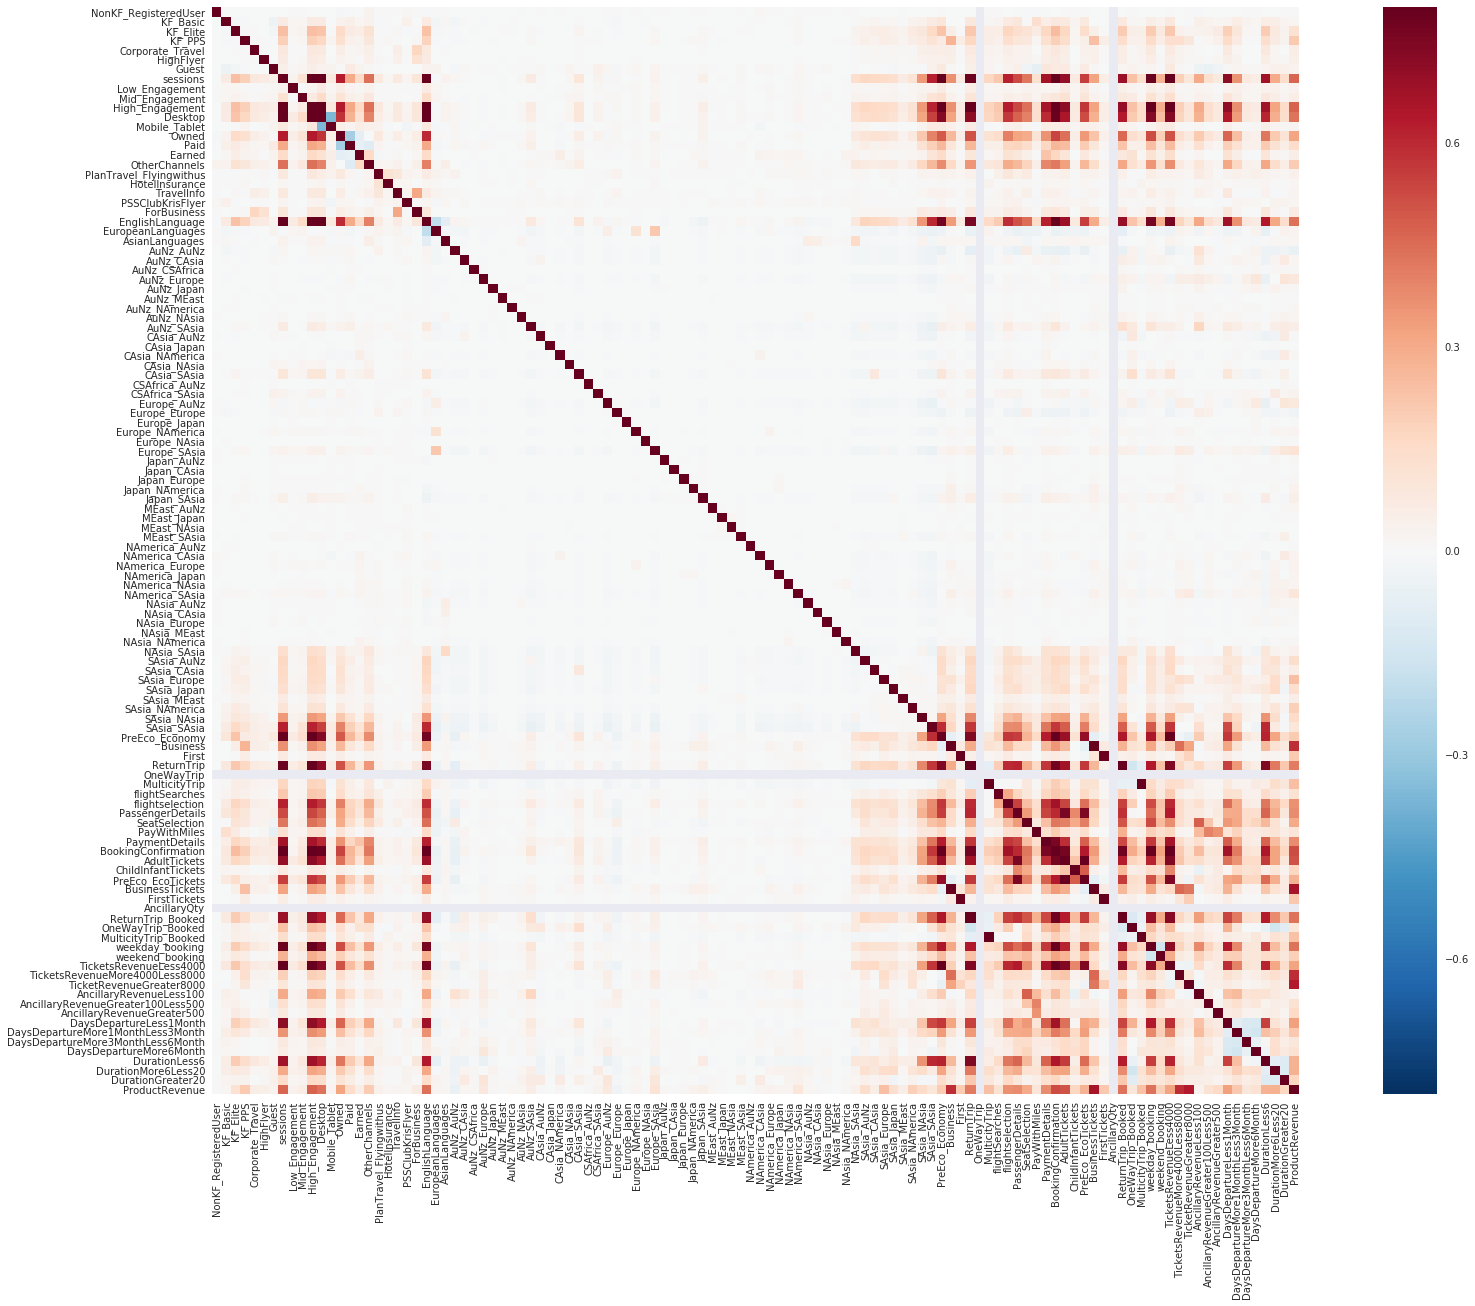

In [12]:
#correlation matrix
corrmat = concatenated_df.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, vmax=.8, square=True);

# Remove Highly Correlated values

If you want to remove  highly correlated values, use the below code and filter your dataframe based on the below feature

In [13]:
#Let us remove highly correlated values

# Create correlation matrix
corr_matrix = concatenated_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Kmeans Cluster with Standardisation

We see that there are high correlations in number of features, and some are completely negatively correlated. Let us now, standarise the data.

In [21]:
#standardize the data to normal distribution
from sklearn import preprocessing
concatenated_prescaled = concatenated_df.drop(['fullVisitorId'], axis=1)
concatenated_prescaled = concatenated_df.drop(['ProductRevenue'], axis=1)
concatenated_df_labels = concatenated_df['fullVisitorId']
results_standardized = concatenated_prescaled

# Get column names first
names = concatenated_prescaled.columns
# Create the Scaler object
scaler = preprocessing.RobustScaler()

# Fit your data on the scaler object
#results_standardized = scaler.fit_transform(concatenated_prescaled)
#results_standardized = pd.DataFrame(results_standardized, columns=names)

# results_standardized = preprocessing.scale(concatenated_prescaled)
# results_standardized = pd.DataFrame(results_standardized)
# results_standardized['fullVisitorId'] = concatenated_df_labels

%env JOBLIB_TEMP_FOLDER=/tmp

env: JOBLIB_TEMP_FOLDER=/tmp


In [ ]:
import time
start_scree = time.time()

def scree_plot(x):
   K = range(1,40)
   KM = [KMeans(n_clusters=k, n_jobs= 16).fit(x) for k in K]
   centroids = [k.cluster_centers_ for k in KM]
   D_k = [cdist(x, cent, 'euclidean') for cent in centroids]
   cIdx = [np.argmin(D,axis=1) for D in D_k]
   dist = [np.min(D,axis=1) for D in D_k]
   avgWithinSS = [sum(d)/x.shape[0] for d in dist]
   
   wcss = [sum(d**2) for d in dist]
   tss = sum(pdist(x)**2)/x.shape[0]
   bss = tss-wcss
   return K, avgWithinSS, tss, bss;

K, avgWithinSS, tss, bss = scree_plot(results_standardized)
# K, avgWithinSS, tss, bss = scree_plot(results_standardized)

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.show()

plt.clf()
plt.cla()
plt.close()

# percentage of variance explained
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.show()

plt.clf()
plt.cla()
plt.close()

end_scree = time.time()
executionTime_scree = round(end_scree - start_scree,0)

print(executionTime_scree)

In [ ]:
# Mini-batch k-means

import time
start_scree = time.time()

def scree_plot(x):
   K = range(1,30)
   KM = [MiniBatchKMeans(n_clusters=k).fit(x) for k in K]
   centroids = [k.cluster_centers_ for k in KM]
   D_k = [cdist(x, cent, 'euclidean') for cent in centroids]
   cIdx = [np.argmin(D,axis=1) for D in D_k]
   dist = [np.min(D,axis=1) for D in D_k]
   avgWithinSS = [sum(d)/x.shape[0] for d in dist]
   
   wcss = [sum(d**2) for d in dist]
   tss = sum(pdist(x)**2)/x.shape[0]
   bss = tss-wcss
   return K, avgWithinSS, tss, bss;

K, avgWithinSS, tss, bss = scree_plot(results_standardized)
# K, avgWithinSS, tss, bss = scree_plot(results_standardized)

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.show()

plt.clf()
plt.cla()
plt.close()

# percentage of variance explained
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.show()

plt.clf()
plt.cla()
plt.close()

end_scree = time.time()
executionTime_scree = round(end_scree - start_scree,0)

print(executionTime_scree)

In [22]:
ks = range(1, 30)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model=MiniBatchKMeans(n_clusters=k)
    
    # Fit model to samples
    # model.fit(concatenated_df)
    model.fit(results_standardized)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

In [23]:
print(model.labels_)
print(model.inertia_)

[22  8 21 ...  5  5 11]
1.0057529371673479e+40


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


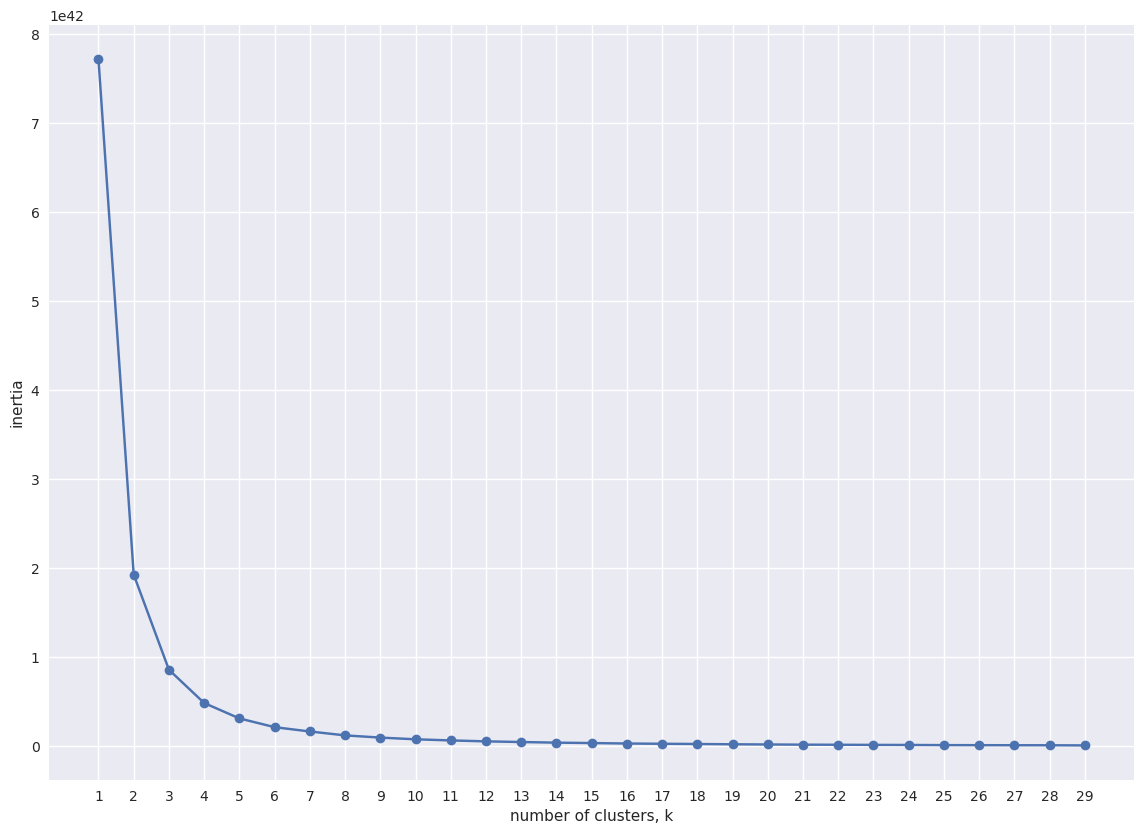

In [24]:
figure(num=None, figsize=(14, 10), dpi=100, facecolor='w', edgecolor='k')
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [25]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', n_jobs= 16, random_state = 42)
y_kmeans = kmeans.fit_predict(results_standardized)

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the results
results_standardized['cluster'] = cluster
concatenated_prescaled['cluster'] = cluster
concatenated_prescaled['fullVisitorId'] = concatenated_df_labels

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(concatenated_prescaled.groupby('cluster').mean(),3))
kmeans_mean_cluster

,NonKF_RegisteredUser,KF_Basic,KF_Elite,KF_PPS,Corporate_Travel,HighFlyer,Guest,sessions,Low_Engagement,Mid_Engagement,...,AncillaryRevenueLess100,AncillaryRevenueGreater100Less500,AncillaryRevenueGreater500,DaysDepartureLess1Month,DaysDepartureMore1MonthLess3Month,DaysDepartureMore3MonthLess6Month,DaysDepartureMore6Month,DurationLess6,DurationMore6Less20,DurationGreater20
cluster,,,,,,,,,,,,,,,,,,,,,
1.0,0.001,0.048,0.021,0.007,0.001,0.001,0.081,1.247,0.003,0.011,...,0.469,0.111,0.021,1.426,1.470,0.398,0.418,0.422,0.353,0.144
2.0,0.001,0.047,0.020,0.007,0.001,0.000,0.082,1.249,0.003,0.011,...,0.472,0.113,0.021,1.415,1.479,0.404,0.422,0.420,0.357,0.144
3.0,0.001,0.048,0.021,0.007,0.001,0.001,0.082,1.249,0.004,0.011,...,0.468,0.112,0.021,1.433,1.464,0.401,0.422,0.423,0.351,0.146
4.0,0.001,0.048,0.020,0.007,0.001,0.001,0.082,1.250,0.003,0.011,...,0.469,0.112,0.021,1.420,1.476,0.402,0.420,0.419,0.357,0.144
5.0,0.001,0.048,0.020,0.007,0.001,0.001,0.083,1.249,0.003,0.011,...,0.467,0.113,0.021,1.424,1.472,0.401,0.422,0.423,0.354,0.143
6.0,0.001,0.047,0.020,0.007,0.001,0.001,0.082,1.252,0.003,0.011,...,0.471,0.111,0.021,1.426,1.472,0.401,0.421,0.423,0.353,0.144


In [12]:
# export list of fullvisitorids and cluster numbers to Google Cloud Storage for use with BigQuery tables
concat_extract = concatenated_prescaled[['fullVisitorId', 'cluster']] 
concat_extract.to_csv("SIA_clustering_ids_clusters.csv", index = False)
!gsutil cp 'SIA_clustering_ids_clusters.csv' 'gs://sparkline-integrators/SIA_clustering_ids_clusters.csv'
%gcs read --object gs://sparkline-integrators/SIA_clustering_ids_clusters.csv --variable concat_extract

# export to BQ, create table from CSV as 'cluster_fullvisitorid' under clustering dataset in Sparkline Integrators BQ. 
# header rows to skip: 1
# datatypes: fullvisitorid: string, cluster: float
# run saved query: basetable_clusterNumber_joining saved under 'Sparkline Integrators BQ'. Save as table 'fullbasetable_withclusters'
# run saved query: cluster_grouping_query saved under 'Sparkline Integrators BQ'




Updates are available for some Cloud SDK components.  To install them,
please run:
  $ gcloud components update

Copying file://SIA_clustering_ids_clusters.csv [Content-Type=text/csv]...
\ [1 files][ 22.7 MiB/ 22.7 MiB]                                                
Operation completed over 1 objects/22.7 MiB.                                     


In [13]:
# export cluster averages to csv
kmeans_mean_cluster.to_csv("kmeans_mean_cluster6.csv")

In [14]:
# count the number of members in each cluster
concatenated_prescaled.groupby(['cluster']).agg(['count'])

,fullVisitorId,NonKF_RegisteredUser,KF_Basic,KF_Elite,KF_PPS,Corporate_Travel,HighFlyer,Guest,sessions,Low_Engagement,...,AncillaryRevenueLess100,AncillaryRevenueGreater100Less500,AncillaryRevenueGreater500,DaysDepartureLess1Month,DaysDepartureMore1MonthLess3Month,DaysDepartureMore3MonthLess6Month,DaysDepartureMore6Month,DurationLess6,DurationMore6Less20,DurationGreater20
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
cluster,,,,,,,,,,,,,,,,,,,,,
1.0,180101,180101,180101,180101,180101,180101,180101,180101,180101,180101,...,180101,180101,180101,180101,180101,180101,180101,180101,180101,180101
2.0,182321,182321,182321,182321,182321,182321,182321,182321,182321,182321,...,182321,182321,182321,182321,182321,182321,182321,182321,182321,182321
3.0,182116,182116,182116,182116,182116,182116,182116,182116,182116,182116,...,182116,182116,182116,182116,182116,182116,182116,182116,182116,182116
4.0,179810,179810,179810,179810,179810,179810,179810,179810,179810,179810,...,179810,179810,179810,179810,179810,179810,179810,179810,179810,179810
5.0,181414,181414,181414,181414,181414,181414,181414,181414,181414,181414,...,181414,181414,181414,181414,181414,181414,181414,181414,181414,181414
6.0,181249,181249,181249,181249,181249,181249,181249,181249,181249,181249,...,181249,181249,181249,181249,181249,181249,181249,181249,181249,181249


In [15]:
clustercount = concatenated_prescaled.groupby(['cluster']).agg(['count'])
clustercount.to_csv("count_cluster6.csv")

In [ ]:
# sum the number of members in each cluster
concatenated_prescaled.groupby(['cluster']).agg(['sum'])
clustercount = concatenated_prescaled.groupby(['cluster']).agg(['sum'])
clustercount.to_csv("sum_cluster5.csv")

In [47]:
# filter dataframe to find members of each cluster
clusterMemberFilter = concatenated_prescaled['cluster']==4
clusterMember = concatenated_prescaled[clusterMemberFilter]
clusterMember

,NonKF_RegisteredUser,KF_Basic,KF_Elite,KF_PPS,Corporate_Travel,HighFlyer,Guest,sessions,Low_Engagement,Mid_Engagement,...,DaysDepartureGreater1Month,NoDuration,DurationLess20,DurationGreater20,AncillaryRevenueLess6000,AncillaryRevenueGreater6000,ProductQuantity,ProductRevenue,cluster,fullVisitorId
1028624,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,4,37600000,4,3.740057e+17


In [48]:
clusterMember.to_csv("clusterMember4.csv")

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


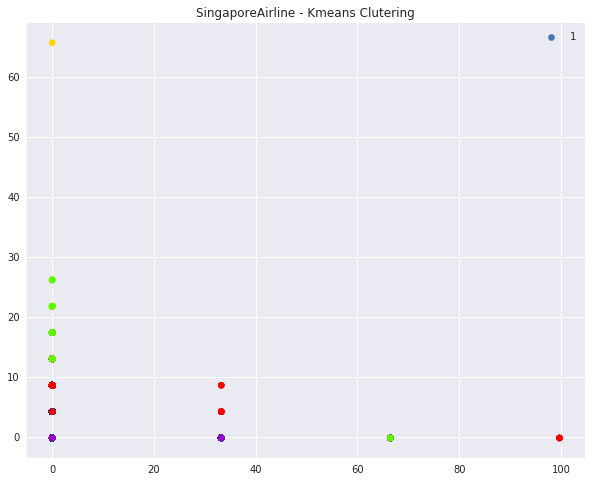

In [17]:
plt.figure('X Cluster K-Means')
plt.figure(figsize=(10, 8))
plt.scatter(results_standardized.iloc[:,0], results_standardized.iloc[:,1],c=y_kmeans, s=40, cmap='prism') 
# plot points with cluster dependent colors
plt.title('SingaporeAirline - Kmeans Clustering')
plt.legend()
plt.show()

# PCA Analysis 

If we want to do a PCA analysis, the below can be used

In [29]:
#Checking PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=[0, 1])
results_standardized = results_standardized.drop(['fullVisitorId', 'cluster'], axis=1)
data_rescaled = scaler.fit_transform(results_standardized)



/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


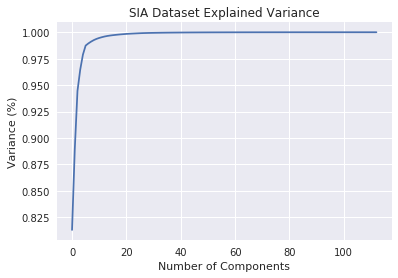

In [31]:
#Fitting the PCA algorithm with our Data
#pca = PCA().fit(data_rescaled)
pca = PCA().fit(results_standardized)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('SIA Dataset Explained Variance')
plt.figure(figsize=(40,20))
plt.show()
#Graph shows that we need to choose between 2-7 components

In [32]:
pca = PCA(n_components=2).fit(results_standardized)
pca_data = pca.transform(results_standardized)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


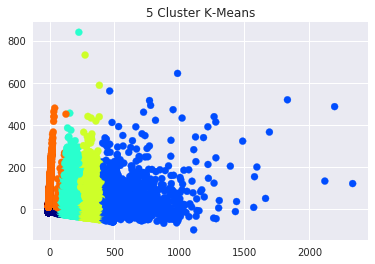

In [33]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', n_jobs= 16, random_state = 42)

kmeansoutput=kmeans.fit(results_standardized)

kmeansoutput

plt.figure('5 Cluster K-Means')

plt.scatter(pca_data[:, 0], pca_data[:,1], c=kmeansoutput.labels_, cmap=plt.cm.jet)

plt.xlabel('')

plt.ylabel('')

plt.title('5 Cluster K-Means')

plt.show()

In [1]:
# Calculate Calinski-Harabaz Index
# The score is higher when clusters are dense and well separated, 
# which relates to a standard concept of a cluster.
metrics.calinski_harabaz_score(results_standardized, labels) 

NameError: name 'metrics' is not defined